In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")
merged_df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,LOCALE,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,1,5,12.0,...,NaN,22667.0,NaN,0.5769,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,1,5,12.0,...,NaN,22684.0,NaN,0.8161,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,1,2,5,12.0,...,10155.0,13380.0,NaN,0.0909,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,1,5,12.0,...,NaN,22059.0,NaN,0.8255,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,1,5,12.0,...,NaN,19242.0,NaN,0.6262,0.366037736,0.442307692,0.491967872,31500,24728,27600


In [4]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,LOCALE,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,1,5,12.0,...,NaN,22667.0,NaN,0.5769,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,1,5,12.0,...,NaN,22684.0,NaN,0.8161,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,1,2,5,12.0,...,10155.0,13380.0,NaN,0.0909,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,1,5,12.0,...,NaN,22059.0,NaN,0.8255,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,1,5,12.0,...,NaN,19242.0,NaN,0.6262,0.366037736,0.442307692,0.491967872,31500,24728,27600


In [5]:
#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

In [6]:
#Convert the data columns to floats
for column in merged_df.columns[10:]:
    merged_df[column] = pd.to_numeric(merged_df[column])
merged_df.dtypes

UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
MAIN                  int64
ICLEVEL               int64
CONTROL               int64
REGION                int64
LOCALE              float64
LATITUDE            float64
LONGITUDE           float64
ADM_RATE            float64
NPT4_PUB            float64
NPT4_PRIV           float64
COSTT4_A            float64
COSTT4_P            float64
RET_FT4             float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

In [7]:
merged_df.count()

UNITID              3180
INSTNM              3180
CITY                3180
STABBR              3180
ZIP                 3180
MAIN                3180
ICLEVEL             3180
CONTROL             3180
REGION              3180
LOCALE              2914
LATITUDE            2914
LONGITUDE           2914
ADM_RATE            1765
NPT4_PUB             707
NPT4_PRIV           1637
COSTT4_A            2314
COSTT4_P              31
RET_FT4             2169
COMPL_RPY_3YR_RT    2559
COMPL_RPY_5YR_RT    2496
COMPL_RPY_7YR_RT    2348
GRAD_DEBT_MDN_x     2673
GRAD_DEBT_MDN_y     2208
MD_EARN_WNE_P10     2225
dtype: int64

In [17]:
#Create a smaller sample to test with
test_df = merged_df.sample(n=400)
test_df = test_df.reset_index()
test_df.head()

,index,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,1065,178387,Missouri Western State University,Saint Joseph,MO,64507,1,1,1,4,...,NaN,16800.0,NaN,0.6589,0.713819,0.797714,0.815278,22000.0,16741.0,35200.0
1,2239,243780,Purdue University-Main Campus,West Lafayette,IN,47907-2040,1,1,1,3,...,NaN,22698.0,NaN,0.9147,0.858416,0.903284,0.934218,20428.0,15625.0,50800.0
2,1812,218070,Furman,Greenville,SC,29613-6162,1,1,2,5,...,28038.0,60326.0,NaN,0.8338,0.866530,0.900000,0.941989,26000.0,17833.5,48300.0
3,3087,24378006,Purdue University - Purdue Polytechnic Columbus,Columbus,IN,47203,0,1,1,3,...,NaN,NaN,NaN,NaN,0.858416,0.903284,0.934218,20428.0,NaN,NaN
4,1788,217402,Providence College,Providence,RI,02918-0001,1,1,2,1,...,37476.0,60139.0,NaN,0.9322,0.854271,0.894404,0.926380,27000.0,19125.0,59200.0


In [18]:
test_df = test_df.loc[test_df["MD_EARN_WNE_P10"]<200000]

In [19]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

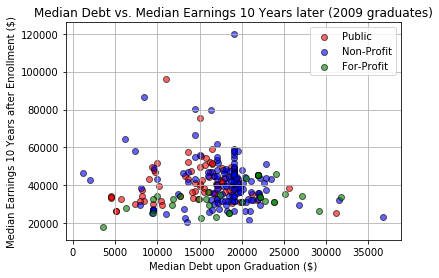

In [20]:
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label="Public", color="r", edgecolors="k", alpha=0.6)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label="Non-Profit", color="b", edgecolors="k", alpha=0.6)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label="For-Profit", color="g", edgecolors="k", alpha=0.6)
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.title("Median Debt vs. Median Earnings 10 Years later (2009 graduates)")
plt.grid()
plt.legend()

In [45]:
bins = np.arange(0, 40000, 1000)
group_names = []
for n in range(1, len(bins)):
    group_names.append(f"{bins[n-1]} - {bins[n]}")

test_df["Debt Category"] = pd.cut(test_df["GRAD_DEBT_MDN_x"], bins, labels=group_names)
debt_histogram = test_df[["CONTROL", "Debt Category", "index"]].groupby(["CONTROL", "Debt Category"]).count()

In [47]:
debt_histogram.fillna(0)

index
CONTROL Debt Category       
1       0 - 1000         0.0
        1000 - 2000      0.0
        2000 - 3000      0.0
        3000 - 4000      0.0
        4000 - 5000      3.0
        5000 - 6000      1.0
        6000 - 7000      2.0
        7000 - 8000      0.0
        8000 - 9000      4.0
        9000 - 10000     0.0
        10000 - 11000    3.0
        11000 - 12000    2.0
        12000 - 13000    3.0
        13000 - 14000    2.0
        14000 - 15000    5.0
        15000 - 16000    1.0
        16000 - 17000    2.0
        17000 - 18000    0.0
        18000 - 19000    1.0
        19000 - 20000    5.0
        20000 - 21000    9.0
        21000 - 22000    6.0
        22000 - 23000    7.0
        23000 - 24000    3.0
        24000 - 25000    7.0
        25000 - 26000    3.0
        26000 - 27000    6.0
        27000 - 28000    1.0
        28000 - 29000    1.0
        29000 - 30000    1.0
...                      ...
3       9000 - 10000     1.0
        10000 - 11000    0.0
        11000 - 12000    0.0
        12000 - 13000    1.0
        13000 - 14000    1.0
        14000 - 15000    1.0
        15000 - 16000    0.0
        16000 - 17000    0.0
        17000 - 18000    2.0
        18000 - 19000    1.0
        19000 - 20000    1.0
        20000 - 21000    1.0
        21000 - 22000    1.0
        22000 - 23000    3.0
        23000 - 24000    1.0
        24000 - 25000    3.0
        25000 - 26000    0.0
        26000 - 27000    2.0
        27000 - 28000    0.0
        28000 - 29000    5.0
        29000 - 30000    0.0
        30000 - 31000    7.0
        31000 - 32000    0.0
        32000 - 33000    1.0
        33000 - 34000    0.0
        34000 - 35000    1.0
        35000 - 36000    1.0
        36000 - 37000    0.0
        37000 - 38000    0.0
        38000 - 39000    0.0

[117 rows x 1 columns]